In [1]:
%matplotlib inline

## Styles

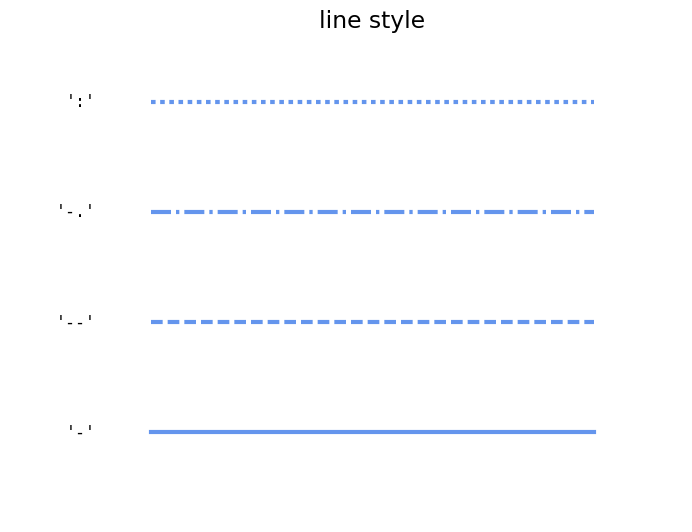

In [2]:
"""
Reference for line-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt

color = 'cornflowerblue'
points = np.ones(5)    # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5,y,nice_repr(linestyle), **text_style)
    #ax.text(-0.5,y,linestyle, **text_style)
    ax.plot(y*points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line style')

plt.show()

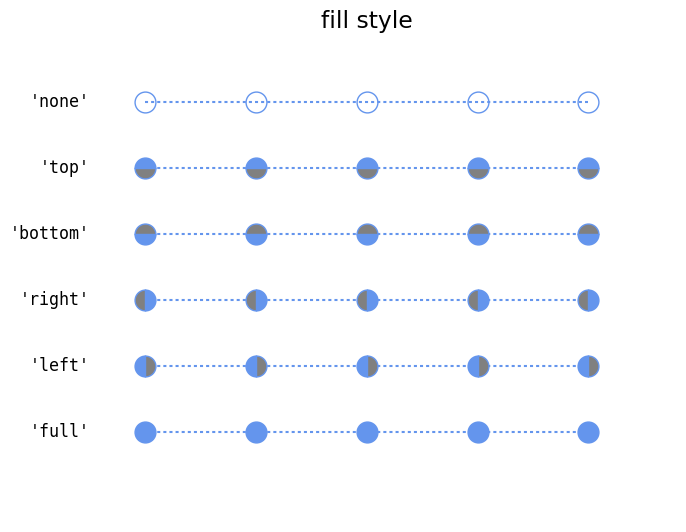

In [3]:
"""
Reference for marker fill-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(5)   # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                   markersize=15, markerfacecoloralt='gray')

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    #print y,y*points
    ax.text(-0.5, y, nice_repr(fill_style), **text_style)
    ax.plot(y*points, fillstyle=fill_style, **marker_style)
    format_axes(ax)
    ax.set_title('fill style')
    
plt.show()

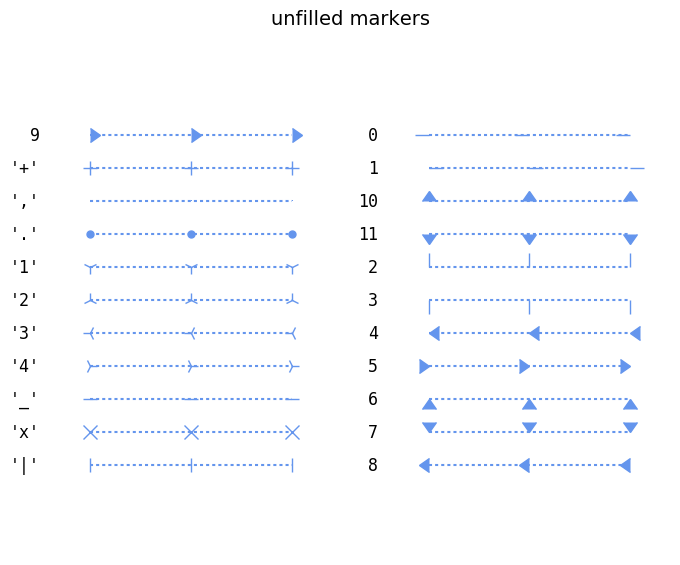

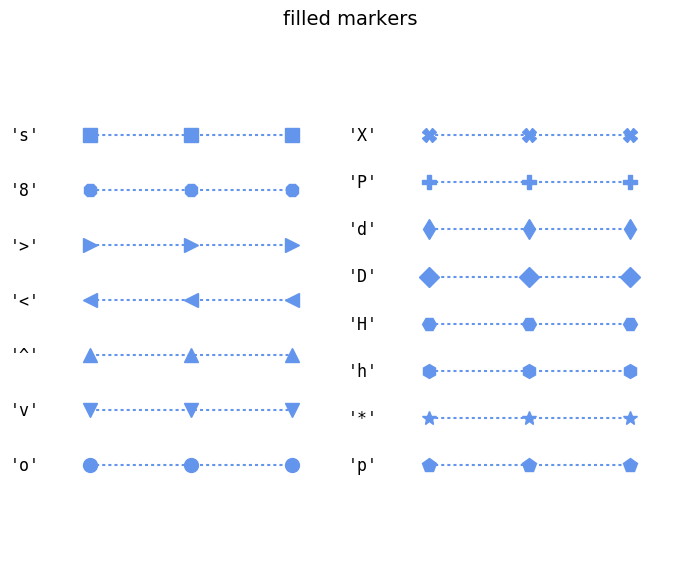

In [4]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""

from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(3)    # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3

unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                   if func != 'nothing' and m not in Line2D.filled_markers]

# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.

unfilled_markers = sorted(unfilled_markers, 
                         key=lambda x: (str(type(x)), str(x)))[::-1]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('unfilled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

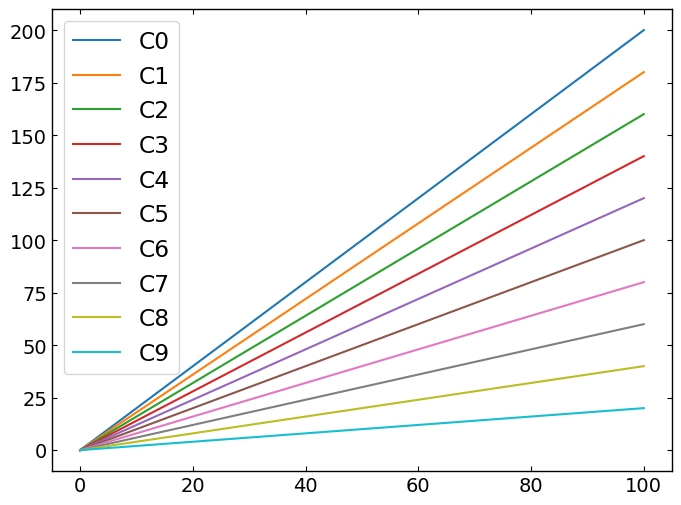

In [29]:
""" Reference of Colors """

import numpy as np
import matplotlib.pyplot as plt

x  = np.linspace(0,100,100)
y0,y1,y2,y3,y4,y5,y6,y7,y8,y9 = 2*x,1.8*x,1.6*x,1.4*x,1.2*x,x,0.8*x,0.6*x,0.4*x,0.2*x

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)

ax.plot(x,y0,label='C0')
ax.plot(x,y1,label='C1')
ax.plot(x,y2,label='C2')
ax.plot(x,y3,label='C3')
ax.plot(x,y4,label='C4')
ax.plot(x,y5,label='C5')
ax.plot(x,y6,label='C6')
ax.plot(x,y7,label='C7')
ax.plot(x,y8,label='C8')
ax.plot(x,y9,label='C9')

ax.legend(loc='best')

### Draw the 2D image in polar coordinate

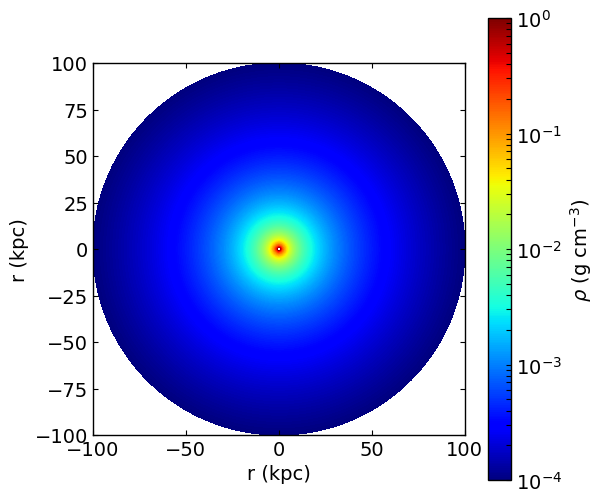

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')    # axisbg is not working for version >2.0 of matplotlib
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
clb = fig.colorbar(p,ax=ax1,label=r'$\rho$ (g cm$^{-3}$)')
#plt.locator_params(nbins=2)

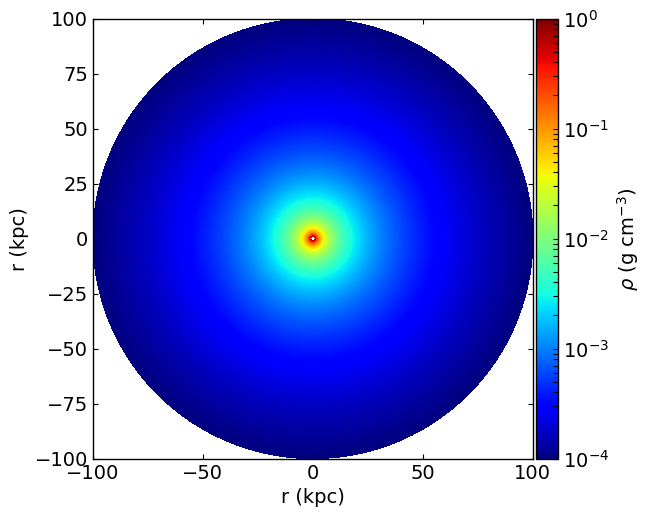

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.03)
# colorbar
clb = fig.colorbar(p,ax=ax1,cax=cax1,label=r'$\rho$ (g cm$^{-3}$)')

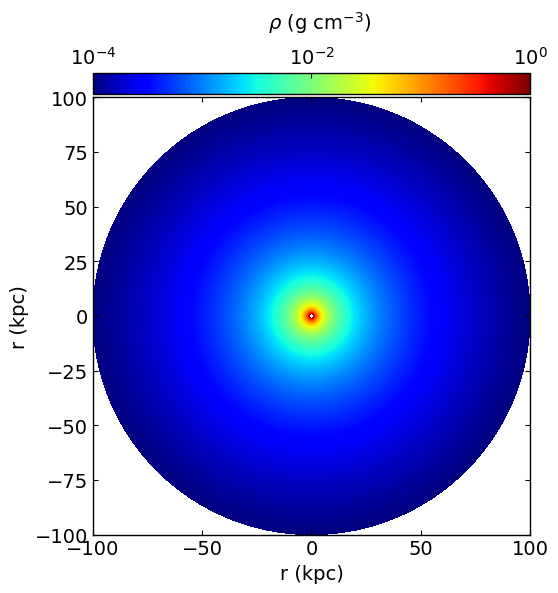

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('top', size='5%', pad=0.03)
clb = fig.colorbar(p,ax=ax1,cax=cax1 \
                   ,orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.annotate(r'$\rho$ (g cm$^{-3}$)',(0.4,3.),xycoords='axes fraction')

# set the number of ticks
clb.locator = mpl.ticker.LogLocator(numticks=3)
# if the scale is not log, but normal, it should be
# clb.locator = mpl.ticker.MaxNLocator(nbins=3)
clb.update_ticks()

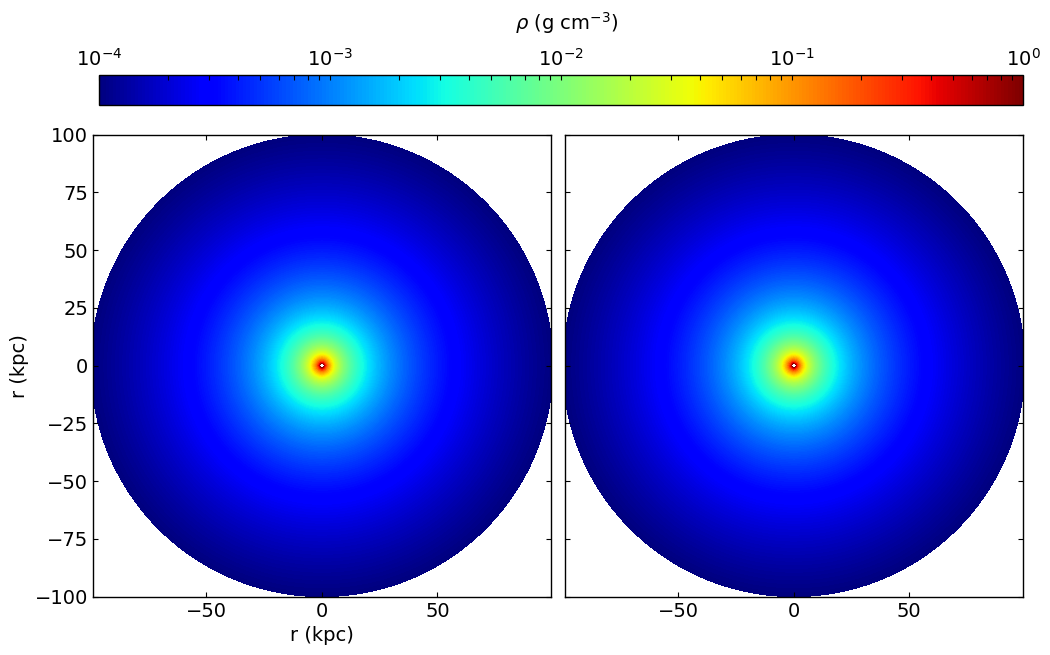

In [8]:
""" Shared axis & colorbar with multiple plots """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')
p = ax2.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

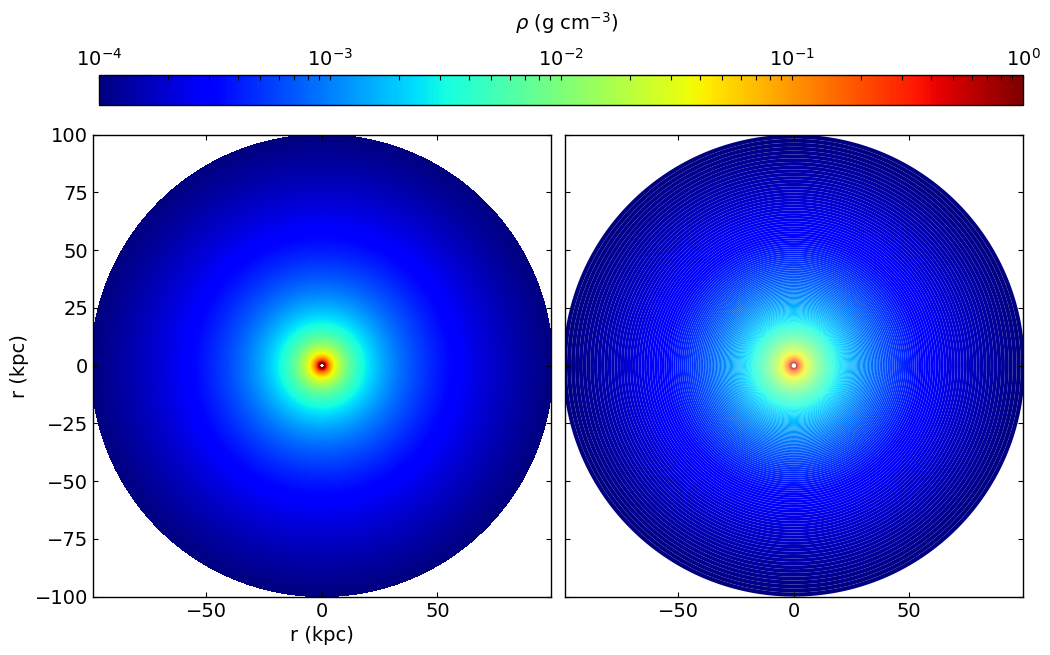

In [5]:
""" antialiased Problem (light borders between contour patches) """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

nlevs=256
vmax=d.max() ; vmin=d.min()
levs = np.power(10.,np.arange(nlevs)/float(nlevs-1)*(np.log10(vmax)-np.log10(vmin)) \
                            + np.log10(vmin))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.contourf(x2d,y2d, d, norm=norm, cmap='jet',antialiased=False, levels=levs)
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')

p = ax2.contourf(x2d,y2d, d, norm=norm, cmap='jet', antialiased=True, levels=levs)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

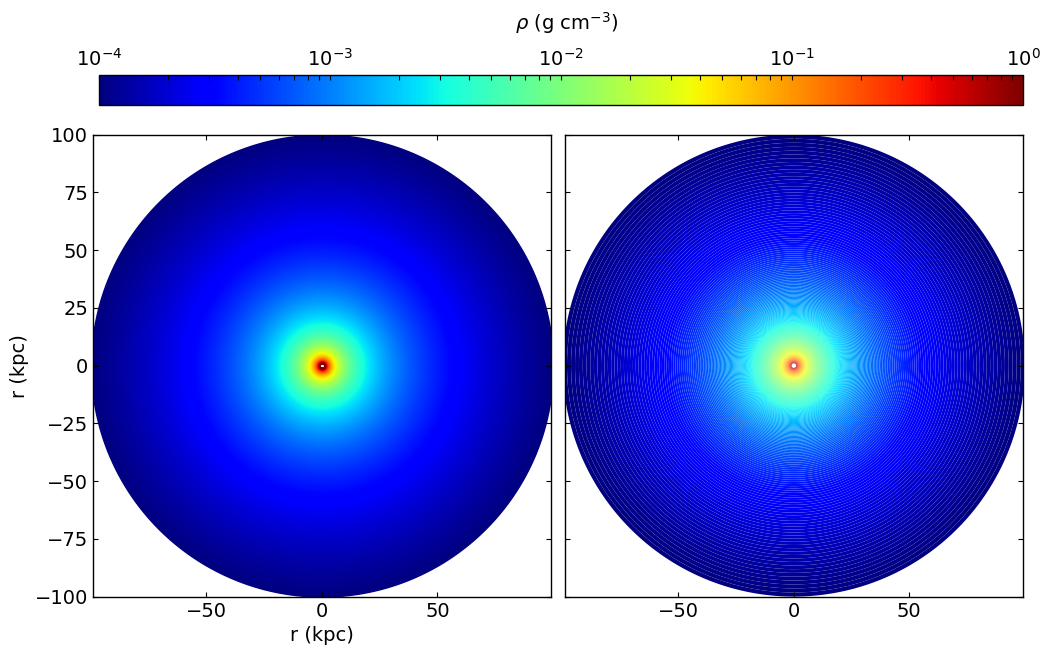

In [11]:
""" antialiased Problem (light borders between contour patches) II
    If we save the figure as postscript file (.eps), the light borders are still shown 
    even without antialised option.
    Solution -> edgecolor of the contour should be set to 'face' """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

nlevs=256
vmax=d.max() ; vmin=d.min()
levs = np.power(10.,np.arange(nlevs)/float(nlevs-1)*(np.log10(vmax)-np.log10(vmin)) \
                            + np.log10(vmin))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.contourf(x2d,y2d, d, norm=norm, cmap='jet',antialiased=False, levels=levs)
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

""" Important Part """
# To erase the antialiased line between counter patches
for c in p.collections:
    c.set_edgecolor("face")


# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')

p = ax2.contourf(x2d,y2d, d, norm=norm, cmap='jet', antialiased=True, levels=levs)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

fig.savefig('../figures/test.eps')

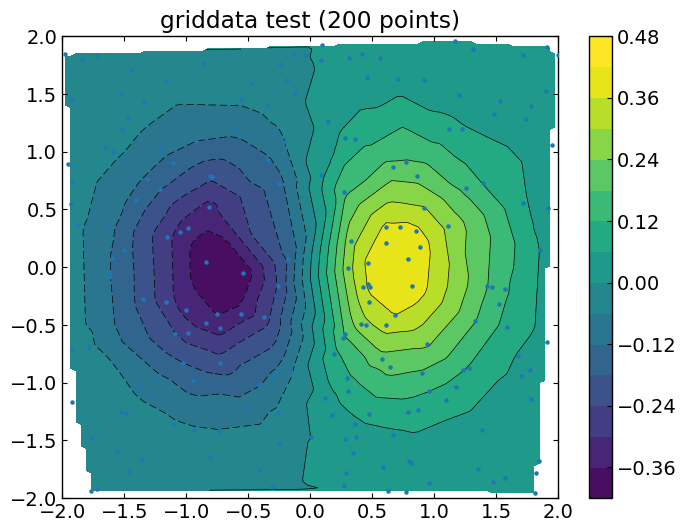

In [9]:
""" Contour non-uniform grid data """

from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()

## Draw vertical & horizontal lines in the figure

* Note that the position in axhline or axvline indicate the relative one for the window size.
--> e.g.) xmin, xmax indicates the relative position for the window size

* To draw the vertical/horizontal lines with the portion of the window with data coordinate, it should be
--> plt.plot((x1,x2),(y1,y2))

[-1, 2, -1, 2]

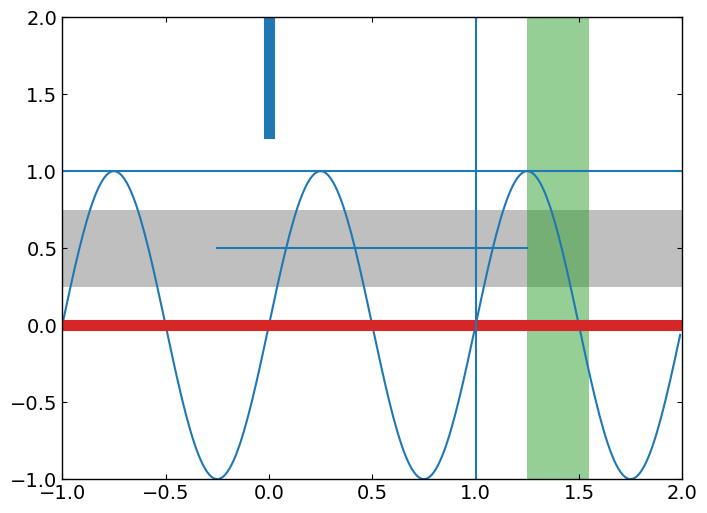

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])

### shared x & y label on multiple plots; managing multiple plots manually

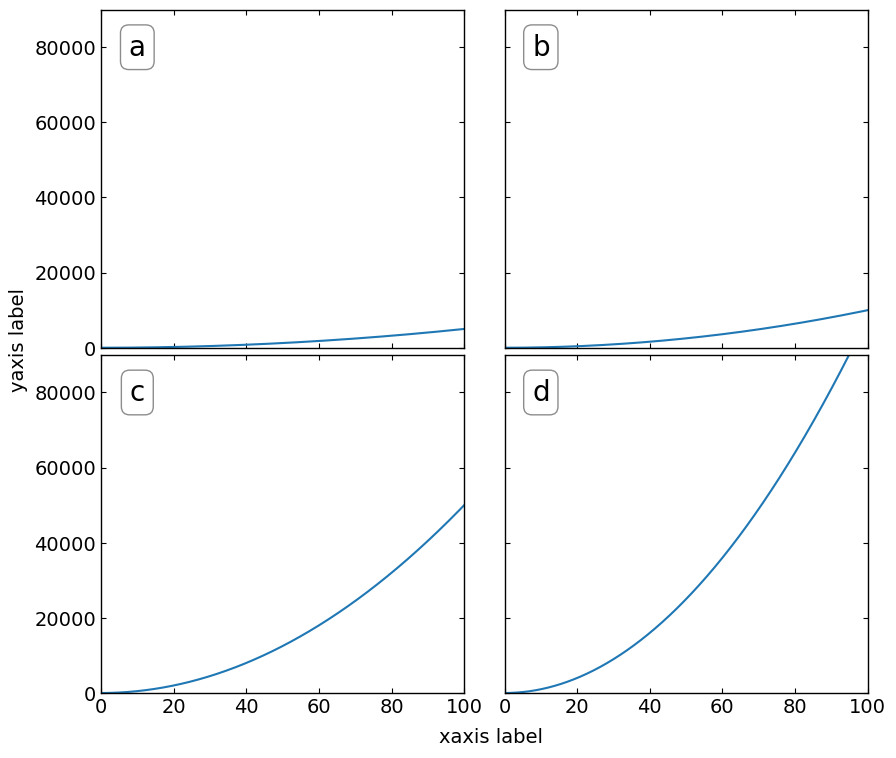

In [23]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

xlim = [0,100]
ylim = [0,90000]

x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# subplots configuration  (position should be converted to normal scale)
pltx0=[30.,10.]; plty0=[20.,10.]   # margin left & right
pltxw=30.; pltyw=5.                # x(horizontal), y(vertical) gap
pltxs=100.; pltys=100.             # plot size
winxs=np.sum(pltx0)+2*pltxs+pltxw; winys=np.sum(plty0)+2*pltys+pltyw

fig = plt.figure(figsize=(9,9*winys/winxs))

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

# first plot
ax1  = fig.add_subplot(221)

ax1.plot(x,y1)

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = fig.add_subplot(222, sharey=ax1)

ax2.plot(x,y2)

ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])

ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=pltxw/winxs)

# third plot
ax3  = fig.add_subplot(223, sharex=ax1)

ax3.plot(x,y3)

ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])

ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.subplots_adjust(hspace=pltyw/winys)

# forth plot
ax4  = fig.add_subplot(224, sharex=ax2, sharey=ax3)

ax4.plot(x,y4)

ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])

ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax4.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=pltyw/winys, wspace=pltxw/winxs)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

# adjust margin
fig.subplots_adjust(left=pltx0[0]/winxs,right=(winxs-pltx0[1])/winxs,bottom=plty0[0]/winys,top=(winys-plty0[1])/winys)

# save the figure
#fig.savefig('test.eps')